# HW3 Malek Jamal Abdulah Malkawi 215061235

In [1]:
from __future__ import print_function, division
%matplotlib inline

import numpy as np
import nsfg
import first
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
import brfss
import matplotlib
import scipy

In [3]:
resp = nsfg.ReadFemResp()

In [23]:
mean1 = resp['timesmar'].dropna().mean()

In [24]:
mean1

1.387057682985943

In [25]:
std1 = resp['timesmar'].dropna().std()

In [26]:
std1

4.297113023253083

In [27]:
mean2 = resp['jintendn'].dropna().mean()

In [29]:
mean2

2.7052556818181817

In [28]:
std2 = resp['jintendn'].dropna().std()

In [30]:
std2

9.710108051456988

In [34]:
pdf1 = thinkstats2.NormalPdf(mean1, std1)
pdf1.Density(mean1 + std1)

0.05631006752900393

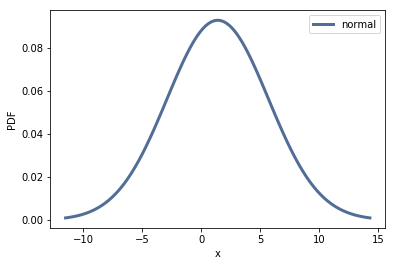

In [37]:
thinkplot.Pdf(pdf1, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF')


In [38]:
pdf2 = thinkstats2.NormalPdf(mean2, std2)
pdf2.Density(mean2 + std2)

0.024919467758428907

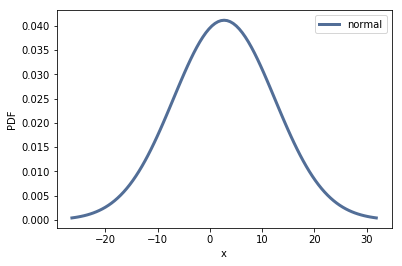

In [39]:
thinkplot.Pdf(pdf2, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF')

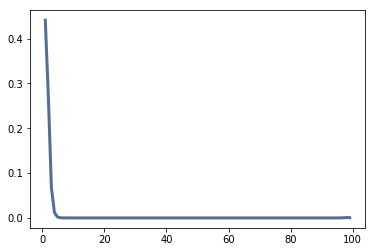

In [6]:
sample = thinkstats2.EstimatedPdf(resp['timesmar'].dropna())
thinkplot.Pdf(sample, label='KDE')

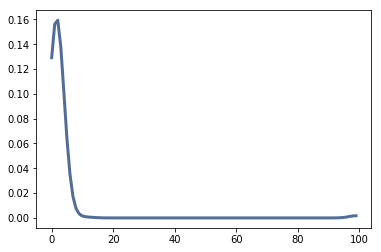

In [7]:
sample2 = thinkstats2.EstimatedPdf(resp['jintendn'].dropna())
thinkplot.Pdf(sample2, label='KDE-2')


In [15]:
import math 
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)

def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = math.sqrt(var)
    
    return CentralMoment(xs, k) / std**k
def Skewness(xs):
    return StandardizedMoment(xs, 3)

def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)
def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = math.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

print (Skewness(resp.jintendn.dropna()))
print (PearsonMedianSkewness(resp.jintendn.dropna()))

9.68691405793
0.5270368429720083


In [16]:
print (Skewness(resp.timesmar.dropna()))
print (PearsonMedianSkewness(resp.timesmar.dropna()))


22.2193072207
0.27025442021022084


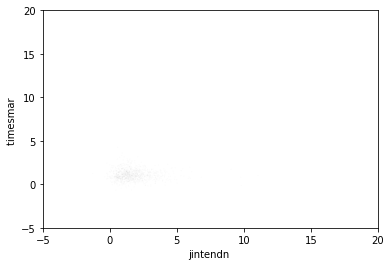

In [17]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values
cleaned = resp.dropna(subset=['timesmar', 'jintendn'])

jintendn = Jitter(resp.jintendn)
timesmar = Jitter(resp.timesmar)




thinkplot.Scatter(jintendn, timesmar, alpha=0.01,s=2,color='black')
thinkplot.Config(xlabel='jintendn ',
                 ylabel='timesmar ',
                axis=[-5, 20, -5, 20],
                 legend=False)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]
[1 1 2 ... 1 1 2]
1 992
2 73
3 7
4 2
[1.0, 2.0, 3.0, 4.0]


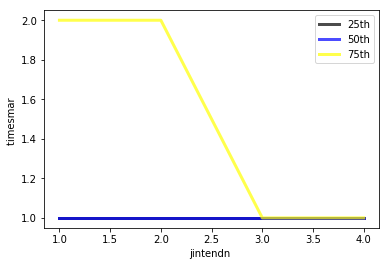

In [32]:
cleaned = resp.dropna(subset=['timesmar', 'jintendn'])
bins = np.arange(1, 100, 1)
print(bins)
indices = np.digitize(cleaned.timesmar, bins)
print(indices)
groups = cleaned.groupby(indices)
print(groups)
for i, group in groups:
    print(i, len(group))

means = [group.timesmar.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.jintendn) for i, group in groups]
print (means)


CustomColors = ["black","blue","yellow"]
percent = [25, 50, 75]
for i in range(len(percent)):
    weight_percentiles = [cdf.Percentile(percent[i]) for cdf in cdfs]
    label = '%dth' % percent[i]
    thinkplot.Plot(mean_heights, weight_percentiles, label=label,color=CustomColors[i])
    
thinkplot.Config(
                 xlabel='jintendn ',
                 ylabel='timesmar ',
                 legend=True)

In [31]:
Mned = resp.dropna(subset=['timesmar', 'jintendn'])
j_1 = Jitter(resp.jintendn)
t_1 = Jitter(resp.timesmar)


p = scipy.stats.pearsonr(j_1, t_1)
print (p)

(nan, 1.0)


In [29]:
pp = scipy.stats.spearmanr(jintendn,timesmar)
print (pp)

SpearmanrResult(correlation=nan, pvalue=nan)
